# Trabalho FINAL — Classificação de Revisões de Filmes
- Equipe: Pioneiros de Dados
  - clebr
  - vi...

## Instalação das Bibliotecas

In [1]:
!pip install catboost
import pandas as pd
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes     import MultinomialNB
from sklearn.metrics         import accuracy_score ,balanced_accuracy_score
from sklearn.ensemble        import RandomForestClassifier

import nltk
from nltk.corpus import stopwords

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling  import RandomOverSampler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


#Acesso ao drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Carregar e preparar os dados

In [12]:

train_critic = pd.read_csv('/content/drive/My Drive/Classificação de Revisões de Filmes/train_critic.csv')
test_critic = pd.read_csv('/content/drive/My Drive/Classificação de Revisões de Filmes/test_critic.csv')


Preparando dados - retirando review nulos

In [13]:
train_critic = train_critic[train_critic['Review'].notna() & train_critic['Review'].str.strip().astype(bool)]
test_critic  = test_critic[test_critic['Review'].notna() & test_critic['Review'].str.strip().astype(bool)]
train_critic['Review']= train_critic['Review'].apply(lambda x: x.lower())
test_critic['Review']= test_critic['Review'].apply(lambda x: x.lower())

#train_critic['Review'] = train_critic['Review'].fillna('')
#test_critic['Review'] = test_critic['Review'].fillna('')


from nltk.stem import PorterStemmer
import spacy
stemmer = PorterStemmer()
nlp = spacy.load('en_core_web_sm')

# Funçoes
def apply_stemming(text):
    tokens = word_tokenize(text)
    stemmed = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed)
def apply_lemmatization(text):
    doc = nlp(text)
    lemmatized = [token.lemma_ for token in doc]
    return ' '.join(lemmatized)

# Aplicar as transformações na coluna Review
#train_critic['Review'] = train_critic['Review'].dropna().apply(apply_stemming)
train_critic['Review'] = train_critic['Review'].dropna().apply(apply_lemmatization)

#test_critic['Review'] = test_critic['Review'].dropna().apply(apply_stemming)
test_critic['Review'] = test_critic['Review'].dropna().apply(apply_lemmatization)


<ipython-input-13-e76a0710671f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_critic['Review']= train_critic['Review'].apply(lambda x: x.lower())


# Balanceando - SMOTE

In [14]:
from imblearn.over_sampling import SMOTE

data = train_critic
X = data[['Show', 'Review']]
y = data['Sentiment']

# Convert text data to numerical representation using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=100, max_df=0.85, min_df=10, ngram_range=(1, 3))
X_vec = vectorizer.fit_transform(X['Review'])
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_vec, y)
# Divide train e test usando somente o conjunto train_critic


# Mostra classes x conjunto treino/teste

In [15]:

from collections import Counter

print("Classes antes do balanceamento (treino):", Counter(y))
print("Classes após o balanceamento (treino):", Counter(y_resampled))

print("\nShape do conjunto de treino:", X_train.shape)
print("Shape do conjunto de teste:", X_test.shape)
print("\nNúmero de amostras por classe no conjunto de treino:")
print(pd.Series(y_train).value_counts())
print("\nNúmero de amostras por classe no conjunto de teste:")
print(pd.Series(y_test).value_counts())

Classes antes do balanceamento (treino): Counter({1: 9995, 0: 1836})
Classes após o balanceamento (treino): Counter({1: 9995, 0: 9995})

Shape do conjunto de treino: (15992, 100)
Shape do conjunto de teste: (3998, 100)

Número de amostras por classe no conjunto de treino:
Sentiment
0    8029
1    7963
Name: count, dtype: int64

Número de amostras por classe no conjunto de teste:
Sentiment
1    2032
0    1966
Name: count, dtype: int64


# Balanceando simples - duplicando ou removendo amostras

In [33]:
#data = train_critic
#print("Distribuição antes balanceamento:")
#print(data['Sentiment'].value_counts())
# Separar as features (Show, Review) e a variável de interesse (Sentiment)
#X = data[['Show', 'Review']]  # Features
#y = data['Sentiment']         # Classe binária

# Converter X para índices porque Random*Sampler trabalha com arrays/matrizes
#X_indices = X.index.values.reshape(-1, 1)

# Inicializar sampler
#sampler = RandomOverSampler(random_state=42)
#sampler = RandomUnderSampler(random_state=42)

# Aplicar o *sample
#_, y_resampled_indices = sampler.fit_resample(X_indices, y)

# Filtrar o DataFrame original com os índices resampleados
#balanced_data = data.iloc[y_resampled_indices.to_numpy().flatten()]

# Verificar o balanceamento
#print("Distribuição após balanceamento:")
#print(balanced_data['Sentiment'].value_counts())
#train_critic = balanced_data

Distribuição antes balanceamento:
Sentiment
1    9995
0    1836
Name: count, dtype: int64
Distribuição após balanceamento:
Sentiment
1    1836
0    1836
Name: count, dtype: int64


# vetorizando

In [34]:
#X_train = train_critic['Review']
#y_train = train_critic['Sentiment']
#vectorizer = TfidfVectorizer(stop_words='english', max_features=100, max_df=0.85, min_df=10,ngram_range=(1, 3))
#X_train = vectorizer.fit_transform(X_train)

#X_test = test_critic['Review']
#y_test = test_critic['Sentiment']

#X_test = vectorizer.transform(X_test)

#print(vectorizer.get_feature_names_out())

['bit' 'brilliant' 'brilliant compulsive' 'brilliant compulsive star'
 'burn' 'burn episode' 'burn episode wasn' 'compulsive' 'compulsive star'
 'compulsive star mind' 'dragged' 'dragged bit' 'episode' 'episode season'
 'episode season dragged' 'episode wasn' 'episode wasn glacial' 'glacial'
 'glacial episode' 'glacial episode season' 'mind' 'mind trip'
 'mind trip series' 'new' 'new season' 'new season try' 'remind'
 'remind slow' 'remind slow burn' 'season' 'season dragged'
 'season dragged bit' 'season try' 'season try remind' 'series' 'slow'
 'slow burn' 'slow burn episode' 'star' 'star mind' 'star mind trip'
 'trip' 'trip series' 'try' 'try remind' 'try remind slow' 'wasn'
 'wasn glacial' 'wasn glacial episode']


# Avaliar modelos

In [17]:
#!pip install catboost
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Dicionário com modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=10, max_features=2),
    'SVC(gamma=2, C=1)': SVC(gamma=2, C=1),
    'SVC(kernel="linear",C=0.025,probability=True)': SVC(kernel="linear",C=0.025,probability=True),
#    'Voting Classifier': voting_clf,
#    'Stacking Classifier': stacking_clf,
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Radius Neighbors': RadiusNeighborsClassifier(radius=10),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
#    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'Neural Network': MLPClassifier(alpha=1),
    'Stochastic Gradient Descent': SGDClassifier(),
    'Ridge Classifier': RidgeClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
#    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB()
#    'GaussianProcessClassifier': GaussianProcessClassifier(1.0 * RBF(1.0))
    }


# treinar

In [18]:
import pandas as pd
from sklearn.metrics import balanced_accuracy_score

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = balanced_accuracy_score(y_test, y_pred)
    results.append({'Model': name, 'Test Accuracy': acc})

# Exibir resultados em um DataFrame
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='Test Accuracy', ascending=False))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                                            Model  Test Accuracy
2                               SVC(gamma=2, C=1)       0.842650
1                                   Random Forest       0.810011
8                                        CatBoost       0.776846
7                                         XGBoost       0.765321
6                               Gradient Boosting       0.727149
4                             K-Nearest Neighbors       0.686656
12                             AdaBoostClassifier       0.662755
11                               Ridge Classifier       0.660472
10                    Stochastic Gradient Descent       0.659426
0                             Logistic Regression       0.658487
9                                  Neural Network       0.648621
3   SVC(kernel="linear",C=0.025,probability=True)       0.648254
13                                  MultinomialNB       0.639040
5                                Radius Neighbors       0.500000


# Calcular melhor gamma C
(nao termina depois que mudou para SMOTE e subdividiu o train pra train e test)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from imblearn.under_sampling import RandomUnderSampler
from google.colab import drive

# BALANCIAMENTO, VETORIZACAO PADRAO USADA INICIALMENTE
# Access Google Drive
#drive.mount('/content/drive')

# Load and prepare the data
#train_critic = pd.read_csv('/content/drive/My Drive/Classificação de Revisões de Filmes/train_critic.csv')
#test_critic = pd.read_csv('/content/drive/My Drive/Classificação de Revisões de Filmes/test_critic.csv')

# Data preparation
#train_critic = train_critic[train_critic['Review'].notna() & train_critic['Review'].str.strip().astype(bool)]
#test_critic = test_critic[test_critic['Review'].notna() & test_critic['Review'].str.strip().astype(bool)]
#train_critic['Review'] = train_critic['Review'].apply(lambda x: x.lower())
#test_critic['Review'] = test_critic['Review'].apply(lambda x: x.lower())

# Balancing - Undersampling
#data = train_critic
#X = data[['Show', 'Review']]
#y = data['Sentiment']
#X_indices = X.index.values.reshape(-1, 1)
#sampler = RandomUnderSampler(random_state=42)
#_, y_resampled_indices = sampler.fit_resample(X_indices, y)
#balanced_data = data.iloc[y_resampled_indices.to_numpy().flatten()]
#train_critic = balanced_data

# Vectorizing
#X_train = train_critic['Review']
#y_train = train_critic['Sentiment']
#vectorizer = TfidfVectorizer(stop_words='english', max_features=100, max_df=0.85, min_df=10, ngram_range=(1, 3))
#X_train = vectorizer.fit_transform(X_train)

#X_test = test_critic['Review']
#y_test = test_critic['Sentiment']
#X_test = vectorizer.transform(X_test)
#FIM - # BALANCIAMENTO, VETORIZACAO PADRAO USADA INICIALMENTE



# Tuning hyperparameter 'gamma' for SVC
#param_grid = {'gamma': [0.1, 1, 10], 'C': [0.1, 1, 10]} # Expanded parameter grid
#svc = SVC()
#grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='balanced_accuracy', n_jobs=10) # Use n_jobs for parallelization
#grid_search.fit(X_train, y_train)

#print("Best hyperparameters:", grid_search.best_params_)
#print("Best score:", grid_search.best_score_)

# Train the model with the best hyperparameters
#best_svc_model = grid_search.best_estimator_
#y_pred_svc = best_svc_model.predict(X_test)

# Evaluate the model
#acc = balanced_accuracy_score(y_test, y_pred_svc)
#print(f"Test Accuracy with best hyperparameters: {acc}")

# Confusion matrix
#cm = confusion_matrix(y_test, y_pred_svc)
#plt.figure(figsize=(8, 6))
#sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
#            xticklabels=['Negative', 'Positive'],
#            yticklabels=['Negative', 'Positive'])
#plt.xlabel("Predicted Label")
#plt.ylabel("True Label")
#plt.title(f"Confusion Matrix for SVC (Best Hyperparameters)")
#plt.show()

# treina MODELO escolhido  mostrar matrix de Confusao.

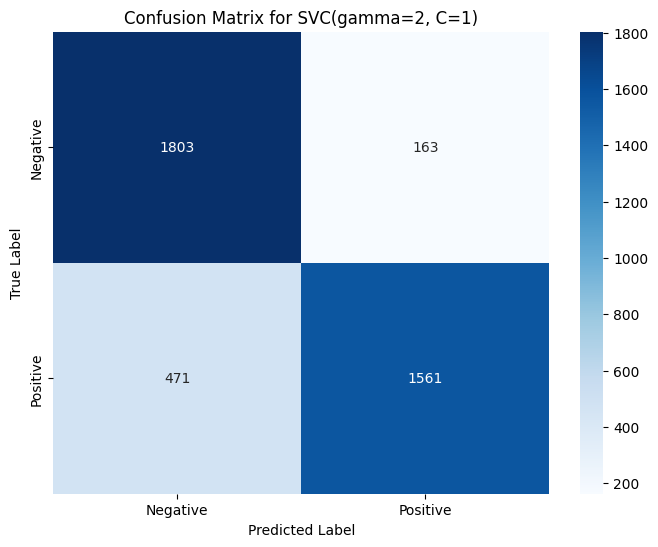

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Treinar o modelo SVC(gamma=0.1, C=0.1)
svc_model = SVC(gamma=2, C=1)
svc_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_svc = svc_model.predict(X_test)

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred_svc)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVC(gamma=2, C=1)")
plt.show()

# Validacao final
(usando o conjunto fornecido como test_critic, voltamos para 0.5 de Ac.B )

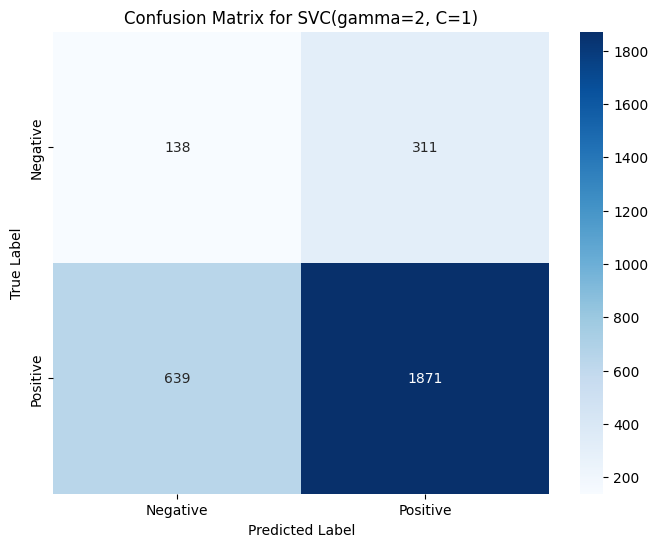

balanced_accuracy_score: 0.5263839963087515


In [24]:

X = test_critic[['Show', 'Review']]
y = test_critic['Sentiment']
vectorizer = TfidfVectorizer(stop_words='english', max_features=100, max_df=0.85, min_df=10, ngram_range=(1, 3))
# Fit the vectorizer to your training data before transforming the test data
vectorizer.fit(train_critic['Review']) # Assuming train_critic is your training data

X_vec = vectorizer.transform(X['Review'])

# Fazer previsões
y_pred_svc = svc_model.predict(X_vec)

# Gerar a matriz de confusão
cm = confusion_matrix(y, y_pred_svc)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVC(gamma=2, C=1)")
plt.show()
# ACURACIA BALANCIADA
acc = balanced_accuracy_score(y, y_pred_svc)
print(f"balanced_accuracy_score: {acc}")
